<a href="https://colab.research.google.com/github/DIVASRAJAN/sentiment_analysis/blob/main/seniment_chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation

In [ ]:
nltk.download("opinion_lexicon")
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [ ]:
def get_sentiment_score(text):

    total_score = 0

    raw_sentences = sent_tokenize(text)

    for sentence in raw_sentences:

        sent_score = 0
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))


    return total_score

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!cp "/content/drive/MyDrive/self projects/sentiment_chatgpt/file.csv" "/content"

In [ ]:
df=pd.read_csv('/content/file.csv')


In [ ]:
df = df.drop(columns=['Unnamed: 0','labels'],axis=1)
df

,tweets
0,ChatGPT: Optimizing Language Models for Dialog...
1,"Try talking with ChatGPT, our new AI system wh..."
2,ChatGPT: Optimizing Language Models for Dialog...
3,"THRILLED to share that ChatGPT, our new model ..."
4,"As of 2 minutes ago, @OpenAI released their ne..."
...,...
219289,Other Software Projects Are Now Trying to Repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...
219291,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...


In [ ]:
df.isna().sum()

tweets    0
dtype: int64

In [ ]:
df['score']=df['tweets'].apply(lambda x: get_sentiment_score(x))


In [ ]:
df

,tweets,score
0,ChatGPT: Optimizing Language Models for Dialog...,0.000000
1,"Try talking with ChatGPT, our new AI system wh...",0.125000
2,ChatGPT: Optimizing Language Models for Dialog...,0.000000
3,"THRILLED to share that ChatGPT, our new model ...",0.125000
4,"As of 2 minutes ago, @OpenAI released their ne...",0.076923
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,0.000000
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,0.000000
219291,chatgpt is being disassembled until it can onl...,-0.111111
219292,2023 predictions by #chatGPT. Nothing really s...,0.000000


<Axes: xlabel='score', ylabel='Count'>

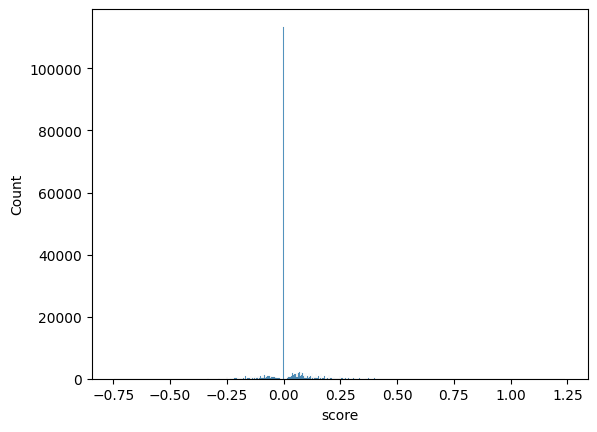

In [ ]:
sns.histplot(x='score', data=df.query("score < 8 and score > -8"))

In [ ]:
df['sentiment'] = df['score'].apply(lambda x: "positive" if x>0 else ("negative" if x<0 else "neutral"))


In [ ]:

df

,tweets,score,sentiment
0,ChatGPT: Optimizing Language Models for Dialog...,0.000000,neutral
1,"Try talking with ChatGPT, our new AI system wh...",0.125000,positive
2,ChatGPT: Optimizing Language Models for Dialog...,0.000000,neutral
3,"THRILLED to share that ChatGPT, our new model ...",0.125000,positive
4,"As of 2 minutes ago, @OpenAI released their ne...",0.076923,positive
...,...,...,...
219289,Other Software Projects Are Now Trying to Repl...,0.000000,neutral
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,0.000000,neutral
219291,chatgpt is being disassembled until it can onl...,-0.111111,negative
219292,2023 predictions by #chatGPT. Nothing really s...,0.000000,neutral


In [ ]:
df['sentiment'].value_counts()

neutral     113443
positive     72687
negative     33164
Name: sentiment, dtype: int64

In [ ]:
tb_tokenizer = TreebankWordTokenizer()

df["text_lower"] = df['tweets'].apply(lambda rev: str(rev)\
                                                        .translate(str.maketrans('', '', punctuation))\
                                                        .replace("<br />", " ")\
                                                        .lower())

In [ ]:
df

,tweets,score,sentiment,text_lower
0,ChatGPT: Optimizing Language Models for Dialog...,0.000000,neutral,chatgpt optimizing language models for dialogu...
1,"Try talking with ChatGPT, our new AI system wh...",0.125000,positive,try talking with chatgpt our new ai system whi...
2,ChatGPT: Optimizing Language Models for Dialog...,0.000000,neutral,chatgpt optimizing language models for dialogu...
3,"THRILLED to share that ChatGPT, our new model ...",0.125000,positive,thrilled to share that chatgpt our new model o...
4,"As of 2 minutes ago, @OpenAI released their ne...",0.076923,positive,as of 2 minutes ago openai released their new ...
...,...,...,...,...
219289,Other Software Projects Are Now Trying to Repl...,0.000000,neutral,other software projects are now trying to repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,0.000000,neutral,i asked chatgpt to write a nye joke for seos a...
219291,chatgpt is being disassembled until it can onl...,-0.111111,negative,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...,0.000000,neutral,2023 predictions by chatgpt nothing really spe...


In [ ]:
tweet=df['text_lower'].apply(lambda x:tb_tokenizer.tokenize(x)).apply(lambda x:" ".join(x))

In [ ]:
tweet

0         chatgpt optimizing language models for dialogu...
1         try talking with chatgpt our new ai system whi...
2         chatgpt optimizing language models for dialogu...
3         thrilled to share that chatgpt our new model o...
4         as of 2 minutes ago openai released their new ...
                                ...                        
219289    other software projects are now trying to repl...
219290    i asked chatgpt to write a nye joke for seos a...
219291    chatgpt is being disassembled until it can onl...
219292    2023 predictions by chatgpt nothing really spe...
219293           from chatgpt neat stuff httpstcoqjjuf2z2m0
Name: text_lower, Length: 219294, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tb_tokenizer.tokenize(x)]).apply(lambda x:' '.join (x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweet)

In [ ]:
y=df['sentiment']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(data, y)

In [ ]:
y_resampled.value_counts()

negative    33164
neutral     33164
positive    33164
Name: sentiment, dtype: int64

In [ ]:
data

<219294x307096 sparse matrix of type '<class 'numpy.float64'>'
	with 4015120 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

model=BernoulliNB()
model.fit(xtr,ytr)
y_pred =model.predict(xts)
y_pred

array(['neutral', 'neutral', 'positive', ..., 'neutral', 'negative',
       'neutral'], dtype='<U8')

In [ ]:
print(classification_report(yts,y_pred))

              precision    recall  f1-score   support

    negative       0.76      0.57      0.65      9914
     neutral       0.54      0.74      0.63     10055
    positive       0.71      0.63      0.67      9879

    accuracy                           0.65     29848
   macro avg       0.67      0.65      0.65     29848
weighted avg       0.67      0.65      0.65     29848



In [ ]:
import pickle

with open('sentiment_chatgpt.pickle', 'wb') as dump_var:
    pickle.dump(model, dump_var)

In [ ]:
pickle_in = open('sentiment_chatgpt.pickle', 'rb')
pickle_clf = pickle.load(pickle_in)

accuracy_pkl = pickle_clf.score(xts,yts)
accuracy_pkl